# The Starting Point

### Get the data
What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
* Becoming one with the data
* Preparing data for modelling
* Creating a CNN model (starting with a baseline)
* Fitting a model (getting it to find patterns in our data)
* Evaluating a model
* Improving a model
* Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)

## Become one with the data

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-04 16:32:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 209.85.234.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  82.9MB/s    in 1.3s    

2022-02-04 16:32:44 (82.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:

!dir "C:\Users\MUHAMMETTARIKERKAM\Desktop\Bitirme Projesi\ML\Image_Classification_CNN"

dir: cannot access 'C:\Users\MUHAMMETTARIKERKAM\Desktop\Bitirme Projesi\ML\Image_Classification_CNN': No such file or directory


In [ ]:
import os

for dirpath,dirnames, filenames in os.walk("pizza_steak"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.


#### part 2

In [ ]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# Yeni Bölüm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Getting the Class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# İmage Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    #Setup Target Directory
    target_folder= target_dir+"/"+target_class
    
    #Get Random İmage
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)
    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")
    
    return img

['588739.jpg']
Image shape: (512, 512, 3)


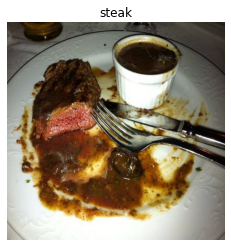

In [ ]:
img= view_random_image(target_dir="pizza_steak/train",
                      target_class="steak")  

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 56,  47,  42],
        [ 54,  45,  40],
        [ 56,  47,  42],
        ...,
        [ 41,  32,  27],
        [ 42,  33,  28],
        [ 47,  38,  33]],

       [[ 53,  44,  39],
        [ 53,  44,  39],
        [ 54,  45,  40],
        ...,
        [ 42,  33,  28],
        [ 43,  34,  29],
        [ 45,  36,  31]],

       [[ 52,  43,  38],
        [ 53,  44,  39],
        [ 54,  45,  40],
        ...,
        [ 43,  34,  29],
        [ 44,  35,  30],
        [ 42,  33,  28]],

       ...,

       [[168, 164, 155],
        [163, 159, 150],
        [167, 163, 154],
        ...,
        [101,  94,  88],
        [ 98,  91,  85],
        [ 97,  90,  84]],

       [[164, 160, 151],
        [166, 162, 153],
        [158, 154, 145],
        ...,
        [100,  93,  87],
        [ 99,  92,  86],
        [100,  93,  87]],

       [[157, 153, 144],
        [166, 162, 153],
        [155, 151, 142],
        ...,
        [104,  97,  9

In [ ]:
img.shape

(384, 512, 3)

In [ ]:
#scales makes better models
img/255.

array([[[0.03529412, 0.04313725, 0.03921569],
        [0.01960784, 0.02745098, 0.02352941],
        [0.01176471, 0.01960784, 0.01568627],
        ...,
        [0.01960784, 0.01960784, 0.01960784],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.01960784, 0.02745098, 0.02352941],
        [0.01176471, 0.01960784, 0.01568627],
        [0.00784314, 0.01568627, 0.01176471],
        ...,
        [0.01176471, 0.01176471, 0.01176471],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627]],

       [[0.01960784, 0.02745098, 0.02352941],
        [0.01568627, 0.02352941, 0.01960784],
        [0.01960784, 0.02745098, 0.02352941],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.00392157, 0.01176471, 0.00784314],
        [0.00392157, 0.01176471, 0.00784314],
        [0.00392157, 0

# Build CNN Network
### * Load our images
### * Preprocessing
### * Build CNN patterns
### * Coompile CNN
### * Fit the CNN to our traning data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Set the seed
tf.random.set_seed(42)

#Preprocessing
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir= "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import Data From directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode ="binary",
                                              seed=42)
test_data= test_datagen.flow_from_directory(directory=test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                            class_mode ="binary",
                                           seed=42)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation= "relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size= 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    #Output model
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

#Compile CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#Fit the model
history_1= model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps= len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 261ms/step - loss: 0.5672 - accuracy: 0.7047 - val_loss: 0.4100 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4205 - accuracy: 0.8073 - val_loss: 0.3584 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 12s 254ms/step - loss: 0.3869 - accuracy: 0.8267 - val_loss: 0.3284 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3765 - accuracy: 0.8333 - val_loss: 0.3374 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.3190 - accuracy: 0.8787 - val_loss: 0.3582 - val_accuracy: 0.8180


** We can see GPU is much faster than normal one**

## lets replicate model we have built already before

In [ ]:
#set random seed
tf.random.set_seed(42)
#Create model
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compiling the model
model_2.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data= (test_data),
                      validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 630ms/step - loss: 1.8418 - accuracy: 0.5073 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#set random seed
tf.random.set_seed(42)
#Create model
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compiling the model
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data= (test_data),
                      validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 228ms/step - loss: 2.4358 - accuracy: 0.6400 - val_loss: 0.5019 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.5995 - accuracy: 0.7313 - val_loss: 1.0139 - val_accuracy: 0.5460
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.7731 - accuracy: 0.7093 - val_loss: 0.7185 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6915 - accuracy: 0.7193 - val_loss: 0.5052 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4577 - accuracy: 0.7900 - val_loss: 0.4279 - val_accuracy: 0.7960


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### Neural networks carries more parameters than CNN so especially in computer vision problems CNN must be used for better results

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### 1. Become one with the data

['225990.jpg']
Image shape: (384, 512, 3)
['2501961.jpg']
Image shape: (512, 512, 3)


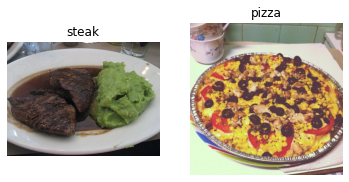

In [ ]:
#visualize of data
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img= view_random_image("pizza_steak/train/","pizza")

Preprocess
* Turn all data to numbers
* Make sure all tensor in right shape
* scale Features

In [ ]:
#Define directory daaset paths
train_dir= "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Turn our data to batches it is the small set of our all data

32 batches is best

In [ ]:
#Create train and test data generators and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale = 1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)


In [ ]:
#Load our image data from directories
train_data= train_datagen.flow_from_directory(directory= train_dir,
                                              target_size=(224,224),
                                              class_mode= "binary",
                                              batch_size= 32)
#Color_mode vs fonksyonlara internetten bakabilirsin
test_data= test_datagen.flow_from_directory(directory= test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32,
                                            color_mode= "rgb")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get a sample of a train batch
images,labels= train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches ı have 1500/32
len(train_data)

47

In [ ]:
#Get the first two images
images[0].shape, images[:2]

((224, 224, 3), array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
   

In [ ]:
#View the labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

3. Create a CNN model

In [ ]:
#Easy model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create a model(base line)
model_4= Sequential([
                     Conv2D(filters= 10,#Number of sliding windows(highher, more complex method)
                            kernel_size=3,#Size of sliding window
                            strides= 1,# Stem bumber of sliding window go through image
                            padding="valid",#Valid means output is compressed, "same" makes input and output same
                            activation="relu",
                            input_shape=(224,224,3)),#İnput layer
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")#outputlayer
])

#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#Fit the model
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch= len(train_data),
                       validation_data= test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 264ms/step - loss: 1.1979 - accuracy: 0.6667 - val_loss: 0.4830 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4775 - accuracy: 0.7927 - val_loss: 0.4446 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3785 - accuracy: 0.8427 - val_loss: 0.4289 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.2332 - accuracy: 0.9193 - val_loss: 0.4287 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 12s 256ms/step - loss: 0.0825 - accuracy: 0.9753 - val_loss: 0.5547 - val_accuracy: 0.8080


In [ ]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_16 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Evaluating our model

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

NameError: ignored

In [25]:
#Function for Validation and Training data

def plot_loss_curves(history):
  
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epo= range(len(history.history["loss"]))
  

  plt.plot(epo, loss, label="Training_Loss")
  plt.plot(epo, val_loss, label="val_Loss")
  plt.title=("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epo, accuracy, label="Training_accuracy")
  plt.plot(epo, val_accuracy, label="val_accuracy")
  plt.title=("accuracy")
  plt.xlabel("epochs")
  plt.legend()

** IMPORTANT** When model validation 
loss starts to increase that means our 
model learning too well,therefore model cannot  generalize the useen data. 

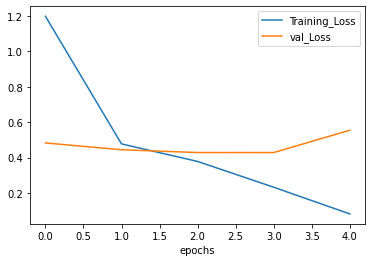

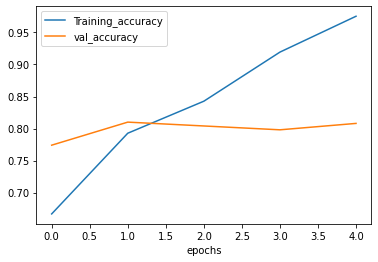

In [ ]:
plot_loss_curves(history_4)

### Adjust the model parameters
0. Create a baseline
1. Beat the baseline by overfitting
2. Reduce overfitting

**Ways to induce overfitting:**
* increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer.

**Reduce overfitting:**
* ADD data augmentation
* Add regularization
* ADD more Data


regulazition also known as reducing overfitting

In [ ]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_16 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Create the model
model_5= Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation= "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model
history_5= model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch =len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 238ms/step - loss: 0.6592 - accuracy: 0.6140 - val_loss: 0.5862 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 15s 319ms/step - loss: 0.5147 - accuracy: 0.7527 - val_loss: 0.4229 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4364 - accuracy: 0.8053 - val_loss: 0.3502 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4194 - accuracy: 0.8140 - val_loss: 0.3556 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3843 - accuracy: 0.8260 - val_loss: 0.3335 - val_accuracy: 0.8580


In [ ]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)     

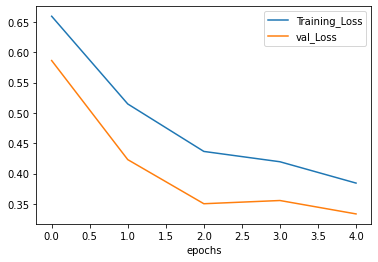

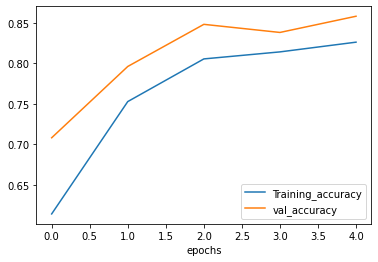

In [ ]:
plot_loss_curves(history_5)

!!!!!!!Data augmentation

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale= 1/255.,
                                           rotation_range= 0.2,#image rotation
                                           shear_range= 0.2,#how much move horizantcally
                                           zoom_range= 0.2,#zoom
                                           width_shift_range= 0.2,
                                           horizontal_flip= True)
train_datagen= ImageDataGenerator(rescale=1/255.)
Test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented Training Data:")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle= False)
print("NON-Augmented Training Data:")
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle= False)
print("NON-Augmented Test Data:")
test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            )

Augmented Training Data:
Found 1500 images belonging to 2 classes.
NON-Augmented Training Data:
Found 1500 images belonging to 2 classes.
NON-Augmented Test Data:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels= train_data.next()
aug_images, aug_labels= train_data_augmented.next()

Showing image number:21


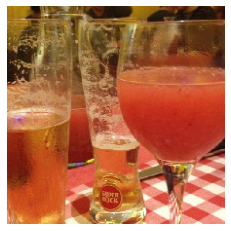

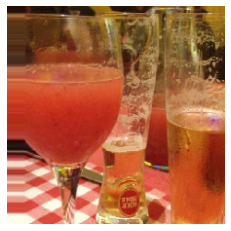

In [ ]:
import random
random_number= random.randint(0,32)# 32 is our batchsize
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.xlabel("Augmented image")
plt.axis(False);

In [ ]:
#Create the model
model_6=Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation= "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")                  
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
#fit the model
history_6=model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch =len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 583ms/step - loss: 0.7366 - accuracy: 0.4527 - val_loss: 0.6941 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 27s 573ms/step - loss: 0.7095 - accuracy: 0.5707 - val_loss: 0.6825 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 27s 576ms/step - loss: 0.6901 - accuracy: 0.5140 - val_loss: 0.6766 - val_accuracy: 0.5300
Epoch 4/5
47/47 [==============================] - 27s 575ms/step - loss: 0.6813 - accuracy: 0.5633 - val_loss: 0.6436 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 27s 573ms/step - loss: 0.6825 - accuracy: 0.6453 - val_loss: 0.6411 - val_accuracy: 0.7040


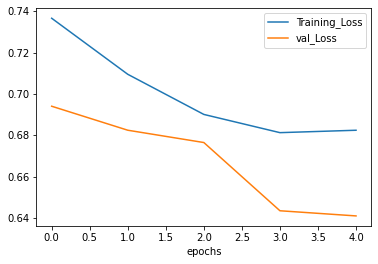

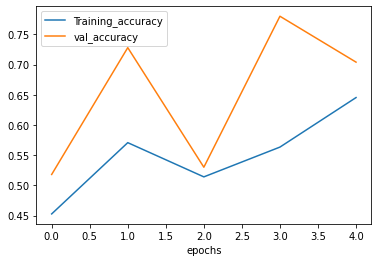

In [ ]:
plot_loss_curves(history_6)

In [ ]:
#Import data and augment it
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(240,240),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle= True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
       Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
        MaxPool2D(),
        Conv2D(10,3, activation="relu"),
        MaxPool2D(),
        Conv2D(10,3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7=model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.6793

InvalidArgumentError: ignored

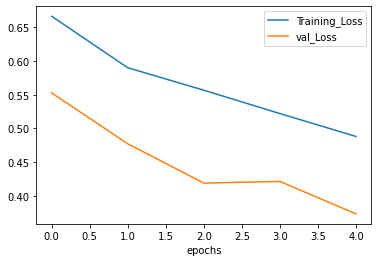

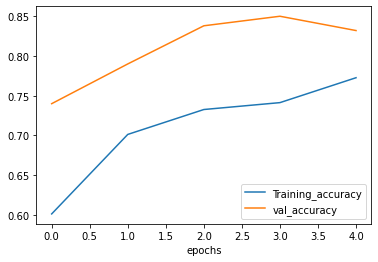

In [ ]:
#  plot loss curves
plot_loss_curves(history_7)

### REPEAT until satisfied
* Increase number of units
* ıncrease number of filters (32,16)
* Train For longer
* Find ideal Rate
* More Data
* **Transfer learning** ??????

### Start over with full Step

In [ ]:
Image_size=(224,224)

#Define directory daaset paths
train_dir= "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Easy model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

#Create train and test data generators and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale = 1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

#Load our image data from directories
train_data= train_datagen.flow_from_directory(directory= train_dir,
                                              target_size=Image_size,
                                              class_mode= "binary",
                                              batch_size= 32,
                                              shuffle= True)
#Color_mode vs fonksyonlara internetten bakabilirsin
test_data= test_datagen.flow_from_directory(directory= test_dir,
                                            target_size=Image_size,
                                            class_mode="binary",
                                            batch_size=32,
                                            color_mode= "rgb")

#get a sample of a train batch
images,labels= train_data.next()
len(images),len(labels)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(32, 32)

In [ ]:
model_7=Sequential([
       Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
        MaxPool2D(),
        Conv2D(10,3, activation="relu"),
        Conv2D(64,3, activation="relu"),
        MaxPool2D(),
        Conv2D(32,3, activation="relu"),
        MaxPool2D(),
        Conv2D(32,3, activation="relu"),
        MaxPool2D(),
        Conv2D(32,3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7=model_7.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
47/47 [==============================] - 13s 252ms/step - loss: 0.6452 - accuracy: 0.6233 - val_loss: 0.5899 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.5045 - accuracy: 0.7707 - val_loss: 0.4144 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4812 - accuracy: 0.7873 - val_loss: 0.4198 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4765 - accuracy: 0.7973 - val_loss: 0.3903 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4183 - accuracy: 0.8247 - val_loss: 0.3608 - val_accuracy: 0.8500


TypeError: ignored

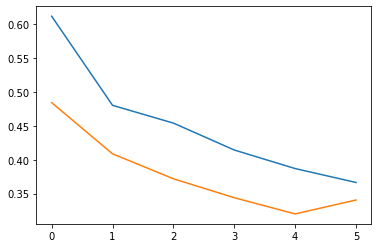

In [ ]:
plot_loss_curves(history_7)

## Making predictions with a custom data

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-02-04 17:10:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-02-04 17:10:19 (30.7 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



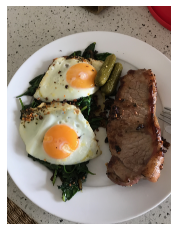

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak= mpimg.imread("03-steak.jpeg")
plt.axis("off")
plt.imshow(steak)

In [ ]:
print(steak.shape)
# We need to re hape our image

(4032, 3024, 3)


### Function for image Pre-Process

In [60]:
def load_and_prep_image(filename, img_shape=224, colour_channel="rgb"):
  #Read image
  img = tf.io.read_file(filename)
  #Decode the read file
  img= tf.image.decode_image(img)
  #Resize the image
  img= tf.image.resize(img,size=[img_shape,img_shape])
  #Scaling the image

  img= img/255
  return img

In [ ]:
!wget 
steak=load_and_prep_image("03-steak.jpeg")

--2022-02-04 17:31:36--  ftp://data/image/jpeg
           => ‘jpeg’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBUVExcVFRUYFxcZGiEbGhoaGyQcJBwfHx8fGhwZISAdICsjHyEoHRkcJDUlKCwuMjIyHyE3PDcxOysxMi4BCwsLDw4PHRERHTkoIykzMTMzMTQxMTExMzExMTExMTEzMTExMTExOTExMTExMTExMTExMTExMTExMTExMTExMf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAFBgMEAAECB//EAEcQAAECBAMFBgMFBgQFAwUAAAECEQADITEEEkEFIlFhcQYTMoGRobHB8EJSYtHhFCNygpKyM0Oi8QdTwtLiFRbTNHODo/L/xAAaAQADAQEBAQAAAAAAAAAAAAACAwQBAAUG/8QALhEAAgICAgECBQMDBQAAAAAAAAECEQMhEjFBBFETIjJhgXGRoRSx8CMzUsHR/9oADAMBAAIRAxEAPwBnxmI7tClzE0QkqdNLB6R5jPxSpkwrUXUS6nrU6e9tKdYfO12JCcJNNqAa8RxhDw2HUFILVKAodTR/j6co8fGtWezJ7oPbJlcstta8X8/LpDXs2UaD69Pn7QC2SyQGAfkXd4P4dTbxTpYfJq+kKlHY1PQWSi1fVviz+scTkBmUXHo3pEMrFJIoryOns/rEC8SBbLoXGv1+UHyVClB2V8Qmak/u1BSfxOD0cAvEQxcwVVKJ5oY/AvFyUtwa63b9DHagNafD1gLGFJG15dlAoP4gU/H8oml4iWqx+B+EdrXSpBGtoB9oVypcsqlo

In [ ]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.839962]], dtype=float32)

In [ ]:
pred_class=class_names[(int(tf.round(pred)))]
pred_class

'steak'

In [43]:
def pred_and_plot(model, filename, class_names = class_names):
  
  #import the target image and pre process it
  img= load_and_prep_image(filename)

  #make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class= class_names[int(tf.round(pred))]
  #plot the image and predicted class
 ##### ? plt.title(f"Prediction: {pred_class}")
  plt.imshow(img)
  plt.axis("off")
  print(pred_class, pred)

steak [[0.9665858]]


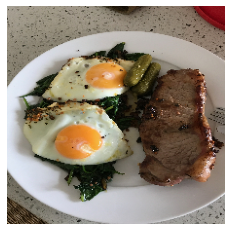

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-02-04 17:53:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-02-04 17:53:45 (35.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



steak [[0.9172041]]


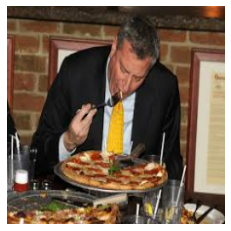

In [ ]:
pred_and_plot(model_7, "/content/images.jfif")

In [ ]:
model_8=Sequential([
       Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
        Conv2D(10,3, activation="relu"),
        MaxPool2D(),
        Conv2D(10,3, activation="relu"),
        Conv2D(10,3, activation="relu"),
        Conv2D(10,3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

#Compile the model
model_8.compile(loss= "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_8=model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
47/47 [==============================] - 13s 252ms/step - loss: 0.6679 - accuracy: 0.6240 - val_loss: 0.5244 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5122 - accuracy: 0.7733 - val_loss: 0.4439 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4688 - accuracy: 0.7960 - val_loss: 0.4080 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 248ms/step - loss: 0.4528 - accuracy: 0.8033 - val_loss: 0.4421 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4253 - accuracy: 0.8093 - val_loss: 0.3773 - val_accuracy: 0.8460


steak [[0.9288895]]


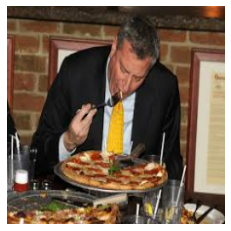

In [ ]:
pred_and_plot(model_8, "/content/images.jfif")

# Multi Class CNN 

1. Become one with the data
2. Pre-Process the data
3. Create the model
4. Fit the Model
5. Evaluate the model
6. Adjust different hyperparameters
7. Repeat until satisfying

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref= zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()



--2022-02-05 12:45:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  74.9MB/s    in 7.6s    

2022-02-05 12:45:56 (64.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 
#walkthrough all classes
for dirpath,dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [3]:
#Setup train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [5]:
#Lets get the class names
import pathlib
import numpy as np

data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3891490.jpg']
Image shape: (512, 384, 3)


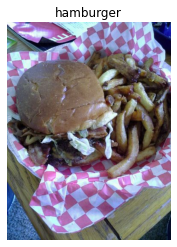

In [14]:
import random
img= view_random_image(target_dir= train_dir,
                       target_class=random.choice(class_names))

### 2. Pre-Process the Data

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_size= 224
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

#load data from directories

train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a base CNN model

In [18]:
#Easy model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [24]:
model_8= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
#Compile the model

model_8.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_8=model_8.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
235/235 [==============================] - 56s 194ms/step - loss: 2.2160 - accuracy: 0.1785 - val_loss: 2.0359 - val_accuracy: 0.2724
Epoch 2/5
235/235 [==============================] - 46s 196ms/step - loss: 1.9648 - accuracy: 0.3093 - val_loss: 1.9092 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 43s 184ms/step - loss: 1.7236 - accuracy: 0.4132 - val_loss: 1.9835 - val_accuracy: 0.2980
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 1.2151 - accuracy: 0.5924 - val_loss: 2.2151 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5375 - accuracy: 0.8329 - val_loss: 3.1702 - val_accuracy: 0.2692


### 5.Evaluate the model

In [27]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 3.1702 - accuracy: 0.2692


[3.1701600551605225, 0.26919999718666077]

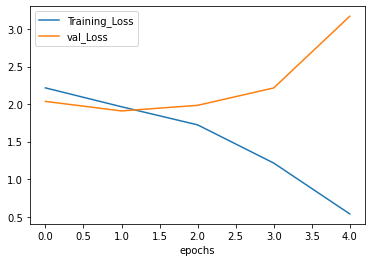

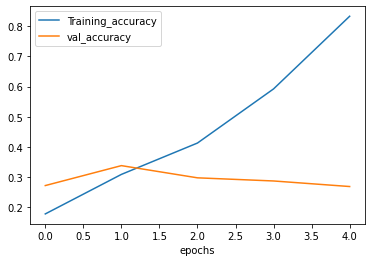

In [28]:
#Losss curves
plot_loss_curves(history_8)

### 6. Beat the base model
* Get more Data 
* Data Processing
* Simplfy Model
* Use transfer learning

In [31]:
model_9= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
#Compile the model

model_9.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_9=model_9.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.1768 - accuracy: 0.1920 - val_loss: 2.0071 - val_accuracy: 0.2852
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.9097 - accuracy: 0.3247 - val_loss: 1.8214 - val_accuracy: 0.3588
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7173 - accuracy: 0.4129 - val_loss: 1.8152 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 1.5147 - accuracy: 0.4885 - val_loss: 1.8299 - val_accuracy: 0.3732
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 1.2795 - accuracy: 0.5668 - val_loss: 2.0626 - val_accuracy: 0.3456


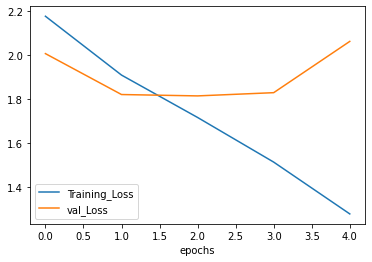

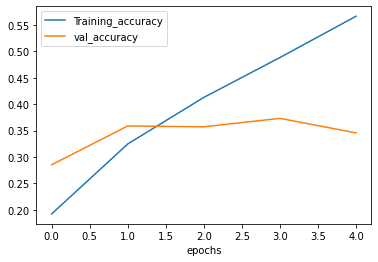

In [32]:
plot_loss_curves(history_9)

### Data augmentation

In [34]:
train_datagen_augmented=ImageDataGenerator(rescale= 1/255.,
                                           rotation_range= 0.2,#image rotation
                                           shear_range= -0.2,#how much move horizantcally
                                           zoom_range= 0.3,#zoom
                                           width_shift_range= 0.2,
                                           horizontal_flip= True)
#Load our image data from directories
train_data_aug= train_datagen_augmented.flow_from_directory(directory= train_dir,
                                              target_size=(IMG_size,IMG_size),
                                              class_mode= "categorical",
                                              batch_size= 32,
                                              shuffle= True)

Found 7500 images belonging to 10 classes.


In [35]:
# model_10= tf.keras.models.clone_mode(model_8)
model_10= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
#Compile the model

model_10.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_10=model_10.fit(
    train_data_aug,
    epochs=5,
    steps_per_epoch=len(train_data_aug),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
235/235 [==============================] - 111s 469ms/step - loss: 2.1865 - accuracy: 0.1864 - val_loss: 2.0454 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0300 - accuracy: 0.2736 - val_loss: 1.9180 - val_accuracy: 0.3232
Epoch 3/5
235/235 [==============================] - 107s 456ms/step - loss: 1.9448 - accuracy: 0.3181 - val_loss: 1.9226 - val_accuracy: 0.3056
Epoch 4/5
235/235 [==============================] - 128s 544ms/step - loss: 1.9102 - accuracy: 0.3316 - val_loss: 1.7852 - val_accuracy: 0.3632
Epoch 5/5
235/235 [==============================] - 115s 488ms/step - loss: 1.8625 - accuracy: 0.3491 - val_loss: 1.7647 - val_accuracy: 0.4008


In [38]:
model_9.evaluate(test_data)

79/79 [==============================] - 18s 223ms/step - loss: 2.0626 - accuracy: 0.3456


[2.0626473426818848, 0.3456000089645386]

In [74]:
prob=model_10.predict(test_data)
prob[:3]

array([[0.18540256, 0.01067348, 0.22766815, 0.12173546, 0.18088865,
        0.00416085, 0.0123513 , 0.21362594, 0.03182326, 0.01167041],
       [0.1925419 , 0.25135857, 0.01341819, 0.01652371, 0.18868273,
        0.01464079, 0.23940662, 0.01713145, 0.04156138, 0.02473465],
       [0.02498315, 0.00126787, 0.3174067 , 0.01350359, 0.0618808 ,
        0.00295898, 0.35959402, 0.18584765, 0.00251136, 0.03004579]],
      dtype=float32)

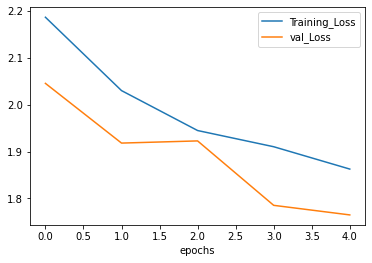

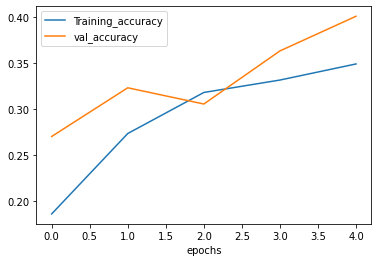

In [39]:
plot_loss_curves(history_10)

### 7. Repeat until satisfy

In [41]:
model_11= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(IMG_size,IMG_size,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="tanh"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
#Compile the model

model_11.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_11=model_11.fit(
    train_data_aug,
    epochs=5,
    steps_per_epoch=len(train_data_aug),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/5
235/235 [==============================] - 110s 467ms/step - loss: 2.2726 - accuracy: 0.1328 - val_loss: 2.1958 - val_accuracy: 0.1960
Epoch 2/5
235/235 [==============================] - 107s 455ms/step - loss: 2.1324 - accuracy: 0.2256 - val_loss: 1.9694 - val_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 107s 453ms/step - loss: 2.0115 - accuracy: 0.2908 - val_loss: 1.8854 - val_accuracy: 0.3484
Epoch 4/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9469 - accuracy: 0.3247 - val_loss: 1.8239 - val_accuracy: 0.3556
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.8953 - accuracy: 0.3420 - val_loss: 1.7676 - val_accuracy: 0.3856


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget 

In [57]:
def pred_and_plot(model, filename, class_names = class_names):
  
  #import the target image and pre process it
  img= load_and_prep_image(filename)

  #make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))

  #multiclass
  if len(pred[0])>1:
    pred_class= class_names[tf.argmax(pred[0])]
  else:
    #Get the predicted class
    pred_class= class_names[int(tf.round(pred))]

  
  #plot the image and predicted class
 ##### ? plt.title(f"Prediction: {pred_class}")
  plt.imshow(img)
  plt.axis("off")
  print(pred_class, pred)

ice_cream [[0.07825271 0.02354147 0.05825208 0.13839465 0.05933862 0.311844
  0.11880884 0.08319827 0.04310529 0.08526408]]


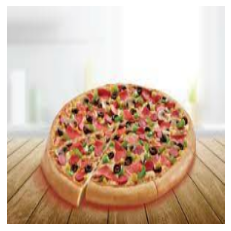

In [70]:
pred_and_plot(model= model_10,
              filename="/content/indir (2).jfif",
              class_names=class_names)

In [126]:
#THE CONFUSION MATRIX
#-------------------------------------------------
import itertools
from sklearn.metrics import confusion_matrix

def PrettyConfusionMatrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15 ):

    cm=confusion_matrix(y_true,y_pred)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]

    #Making prettify
    fig, ax= plt.subplots(figsize=figsize)
    # Create matrix Plot
    cax=ax.matshow(cm,cmap=plt.cm.Oranges)
    fig.colorbar(cax)

    #Create clases

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #axis labeling
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set x axis to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust  label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size+10)
    #set thresh hold for different Colours
    threshold= (cm.max()+cm.min())/2

    #Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment= "center",
                color="white"  if cm[i,j]>threshold else "black",
                size=15)


In [108]:
data_prob=model_10.predict(test_data)
preds=data_prob.argmax(axis=1)
preds[:5], data_prob[:2]

(array([5, 0, 9, 1, 2]),
 array([[0.04574963, 0.06694487, 0.02437512, 0.02676927, 0.15401925,
         0.34906816, 0.01380323, 0.04842456, 0.12940598, 0.14143988],
        [0.36457917, 0.20188217, 0.02314199, 0.09110723, 0.1931014 ,
         0.00543308, 0.03575663, 0.00933285, 0.04119509, 0.03447035]],
       dtype=float32))

In [90]:
test_datagen_1=ImageDataGenerator()

#Load our image data from directories
test_data_2= test_datagen_1.flow_from_directory(directory= test_dir,
                                              target_size=(IMG_size,IMG_size),
                                              class_mode= "categorical",
                                              batch_size= 2500)
images,labels= test_data_2.next()
print(labels.shape)

Found 2500 images belonging to 10 classes.
(2500, 10)


In [91]:
labels[:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [112]:
real_classes=labels.argmax(axis=1)
real_classes[:5]

array([4, 8, 5, 0, 9])

In [116]:

class_names_2 = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger',
               'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']

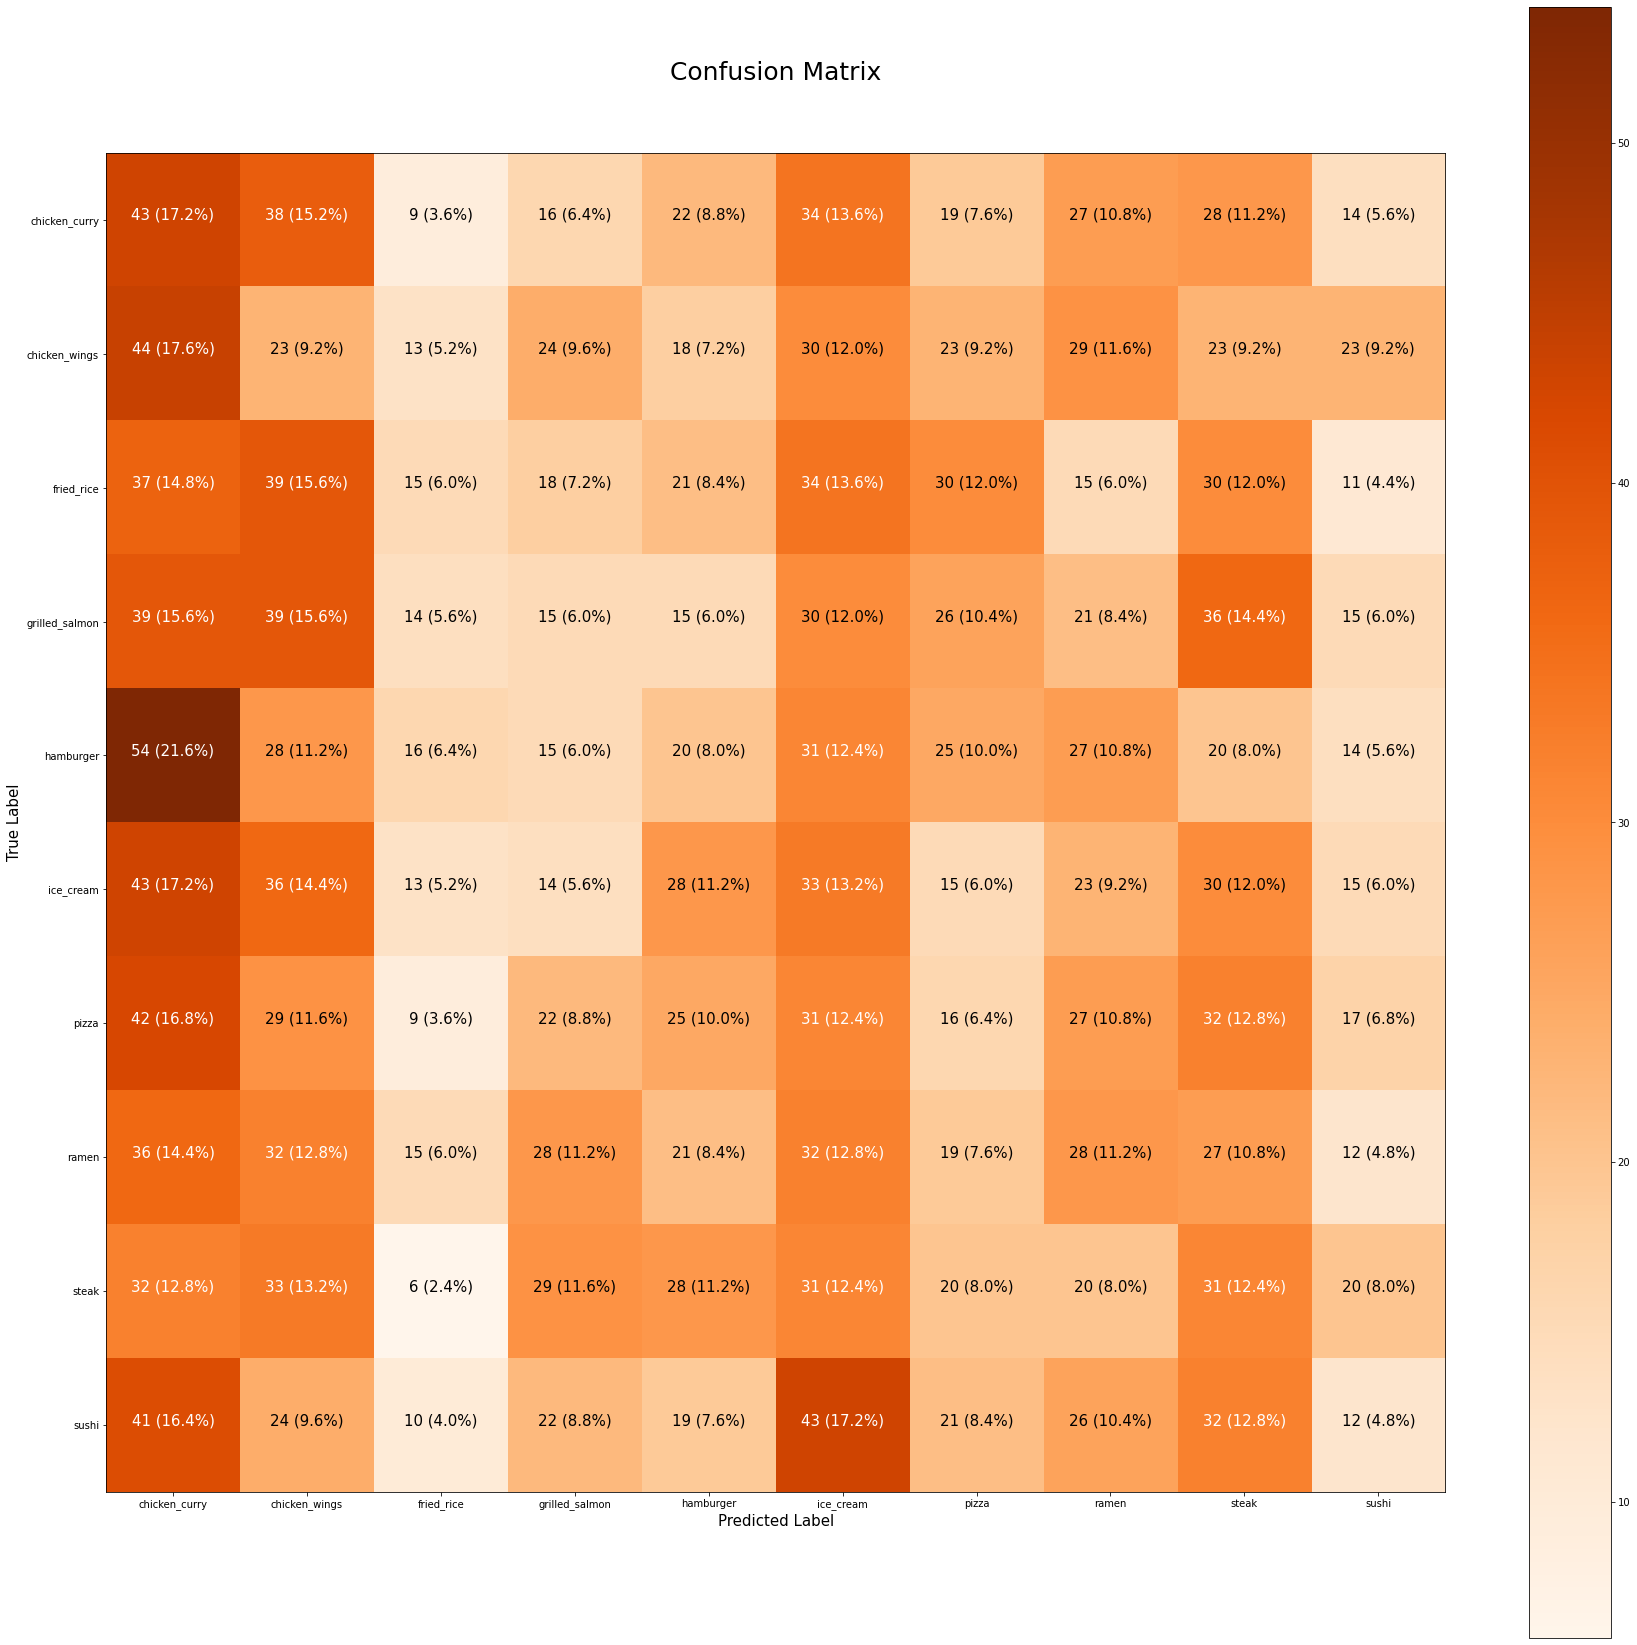

In [127]:
PrettyConfusionMatrix(y_true= real_classes,
                      y_pred= preds,
                      classes=class_names_2,
                      figsize=(30,30),
                      text_size=15)

### Save and Load The model

In [120]:
# save the model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [121]:
#load the model
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")

In [122]:
#comparing models
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 1.7647 - accuracy: 0.4008


[1.7647372484207153, 0.4007999897003174]

In [123]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7647 - accuracy: 0.4008


[1.7647372484207153, 0.4007999897003174]